In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


Using TensorFlow backend.


In [2]:
#2차원 으로 정의
x = np.array([[0,0], [0,1], [1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

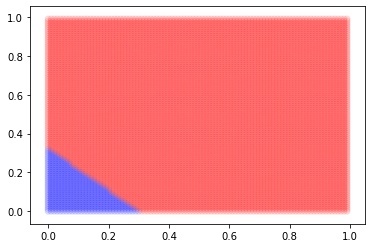

In [3]:
#깊은 층 생성

model = Sequential() 
model.add(Dense(10,input_dim=2)) #1번째 히든층 , (노드수 * input) + bias(node) 수
model.add(Activation('sigmoid'))

model.add(Dense(10)) #출력 층 
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(1)) 
model.add(Activation('sigmoid'))


model.summary()



model.compile(loss='binary_crossentropy', optimizer = 'adam')
model.fit(x,y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(x))

xx, yy = np.mgrid[0:1:0.01, 0:1:0.01] #mesh grid , 엄청많은 점을 찍어준다
grid = np.c_[xx.flatten(), yy.flatten()] # flatten() , 2차원을 1차원으로 변경해주는 함수
print(grid.shape)
h = model.predict_proba(grid) # 확률 값을 표시

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.1)  
plt.savefig('xor.png')

(500,)


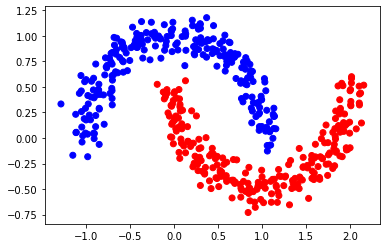

In [4]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.1)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

(500, 2)


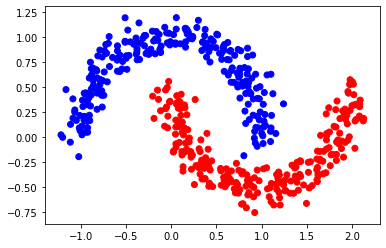

In [24]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.1)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

print(x_data.shape)
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  


In [60]:
#깊은 층 생성

model = Sequential() 
model.add(Dense(5,input_dim=2)) #1번째 히든층 , (노드수 * input) + bias(node) 수
model.add(Activation('sigmoid'))

model.add(Dense(5)) #출력 층 
model.add(Activation('sigmoid'))


model.add(Dense(1)) 
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 5)                 15        
_________________________________________________________________
activation_110 (Activation)  (None, 5)                 0         
_________________________________________________________________
dense_114 (Dense)            (None, 5)                 30        
_________________________________________________________________
activation_111 (Activation)  (None, 5)                 0         
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 6         
_________________________________________________________________
activation_112 (Activation)  (None, 1)                 0         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________

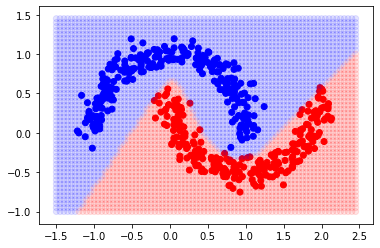

In [66]:
model.compile(loss='binary_crossentropy', optimizer = 'adam')
model.fit(x_data,y_data, batch_size=20, epochs=3000, verbose=0)
#print(model.predict(x_data))

xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05] #mesh grid , 엄청많은 점을 찍어준다
grid = np.c_[xx.flatten(), yy.flatten()] # flatten() , 2차원을 1차원으로 변경해주는 함수
#print(grid.shape)
h = model.predict_proba(grid) # 확률 값을 표시


colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

colors = ["red"  if i ==  1  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.1)  
plt.savefig('xor.png')




# model = Sequential([
#     Dense(5, activation='sigmoid',input_dim=2),   
#     Dense(5, activation='sigmoid'),
#     Dense(1, activation='sigmoid'),
# ])
# model.compile(loss='binary_crossentropy', optimizer=Adam(0.01))  
# model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
#           validation_data=(x_data, y_data))

# colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
# plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
# xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
# grid = np.c_[xx.ravel(), yy.ravel()]
# h = model.predict_proba(grid)
# colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
# plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [69]:
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )


model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer="adam")  
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data),
          callbacks=[printepoch(500)]
         )


0 => {'val_loss': 0.7024179339408875, 'loss': 0.703830873966217}
500 => {'val_loss': 0.2766643792390823, 'loss': 0.27672913372516633}
1000 => {'val_loss': 0.27052794098854066, 'loss': 0.27060616612434385}
1500 => {'val_loss': 0.2674296945333481, 'loss': 0.2674566864967346}
2000 => {'val_loss': 0.26522705256938933, 'loss': 0.2652598708868027}
2500 => {'val_loss': 0.26317421793937684, 'loss': 0.263207283616066}


0 => {'val_loss': 0.802125358581543, 'val_accuracy': 0.5, 'loss': 0.8097855925559998, 'accuracy': 0.5}
500 => {'val_loss': 0.3490123450756073, 'val_accuracy': 0.8880000114440918, 'loss': 0.349243700504303, 'accuracy': 0.888}
1000 => {'val_loss': 0.2863655298948288, 'val_accuracy': 0.8880000114440918, 'loss': 0.2867247641086578, 'accuracy': 0.888}
1500 => {'val_loss': 0.0025765248108655216, 'val_accuracy': 1.0, 'loss': 0.0025841718073934318, 'accuracy': 1.0}
2000 => {'val_loss': 0.00048065981827676295, 'val_accuracy': 1.0, 'loss': 0.00048313564620912076, 'accuracy': 1.0}
2500 => {'val_loss': 0.00013501396169885994, 'val_accuracy': 1.0, 'loss': 0.00013536459882743657, 'accuracy': 1.0}


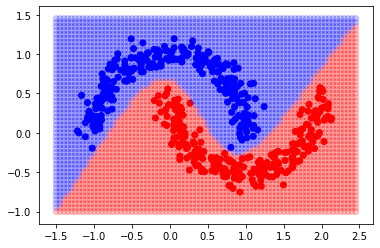

In [71]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer="adam",
    metrics=['accuracy'])  


model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data),
          callbacks=[printepoch(500)] )


colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

In [78]:
model = Sequential([
    Dense(5, activation=LeakyReLU(alpha=0.1),input_dim=2),   
    Dense(5, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(10, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer="adam",
    metrics=['accuracy'])  

In [80]:
model.fit(x_data, y_data, batch_size=100, epochs=1001, verbose=0,
          validation_data=(x_data, y_data),
          callbacks=[printepoch(500)] )

0 => {'val_loss': 8.860044727043714e-06, 'val_accuracy': 1.0, 'loss': 8.932635637393105e-06, 'accuracy': 1.0}
500 => {'val_loss': 1.2983559940948907e-06, 'val_accuracy': 1.0, 'loss': 1.3053451766609214e-06, 'accuracy': 1.0}
1000 => {'val_loss': 2.693467081371637e-07, 'val_accuracy': 1.0, 'loss': 2.702524476205781e-07, 'accuracy': 1.0}


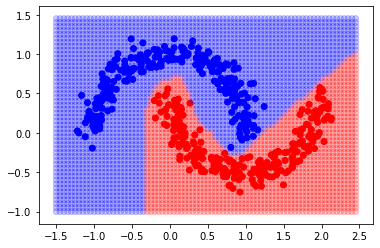

In [76]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  